
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


Constructing Dataset

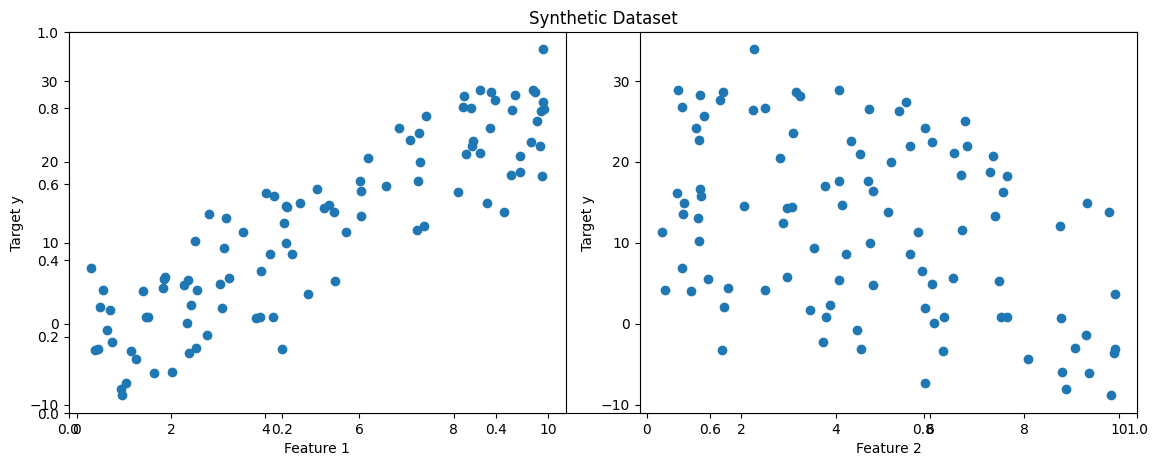

In [2]:
np.random.seed(45)

# Number of samples and features
n_samples = 100
n_features = 2

# X with values between 0 and 10
X = np.random.uniform(0, 10, (n_samples, n_features))

# True weights and bias
true_w = np.array([3.2, -1.7])
true_b = 3.0

# Generating noise to create randomness
noise = np.random.normal(0, 2, n_samples)

# Applying linear regression
y = np.dot(X, true_w) + true_b + noise

# Plotting synthetic dataset
plt.figure(figsize=(12, 5))
plt.title("Synthetic Dataset")

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target y")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target y")

plt.tight_layout()
plt.show()

In [3]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        # Compute mean and standard deviation for each feature
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        #Standardize using stored mean and std
        eps = 1e-8  # to avoid division by zero
        return (X - self.mean_) / (self.std_ + eps)
    
    def fit_transform(self, X):
        #Fit and transform in one step
        self.fit(X)
        return self.transform(X)

In [4]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        
        self.losses = []

        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X,self.w)+ self.b
            
            # MSE Loss
            mse_loss = np.mean((y - y_pred) ** 2)

            # L2 Loss
            l2_loss = self.l2_lambda * np.sum(self.w ** 2)

            # Total loss
            loss = mse_loss + l2_loss
            self.losses.append(loss)

            # Gradients
            dw = (2 / n_samples) * (np.dot(X.T,(y_pred - y))) + 2 * self.l2_lambda * self.w
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Updating weights and biases
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        return np.dot(X,self.w) + self.b

In [5]:
# Standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# Training model using our synthetic dataset
model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)

Plotting training loss vs iterations

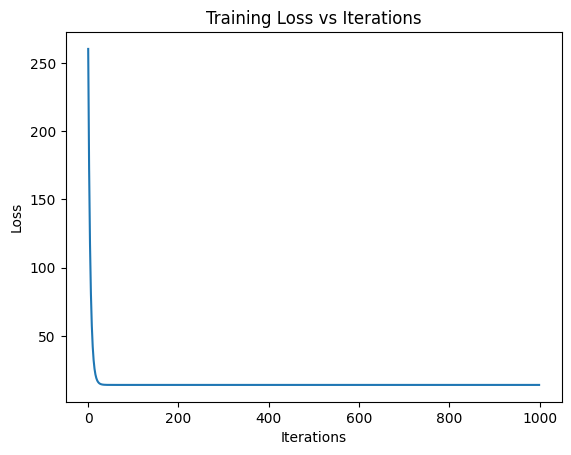

In [6]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()

In [7]:
# The training loss decreases rapidly in early iterations and then converges smoothly

Plotting True vs predicted values

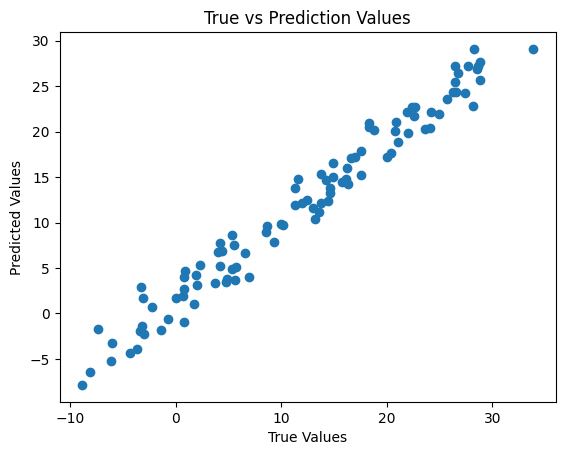

In [8]:
plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Prediction Values")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


Constructing binary dataset

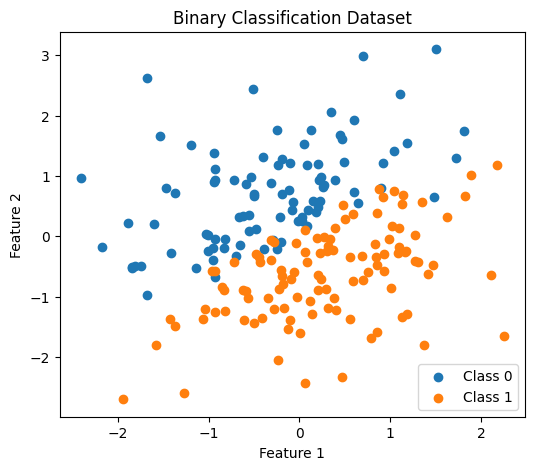

In [9]:
np.random.seed(45)  

# Total number of samples
n_samples = 200                         

# Generate two input features from normal distribution
X = np.random.randn(n_samples, 2)

true_w = np.array([2.0, -3.0])   # True weights for data generation
true_b = 0.5                     # True bias

# Compute linear combination of features
linear_output = np.dot(X,true_w) + true_b

# Add Gaussian noise to make classification realistic
noise = np.random.normal(0, 0.5, size=n_samples)

y = (linear_output + noise > 0).astype(int)

plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.legend()
plt.show()

In [13]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [14]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        self.losses = []

        for _ in range(self.epochs):
            # Linear model
            z = np.dot(X,self.w) + self.b
            
            # Apply sigmoid
            y_pred = sigmoid(z)

            # Compute Binary Cross Entropy loss
            eps = 1e-8  
            loss = -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps)) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * (X.T @ (y_pred - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Updating weights and biases
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self


    def predict_proba(self, X):
        return sigmoid(np.dot(X,self.w)+ self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


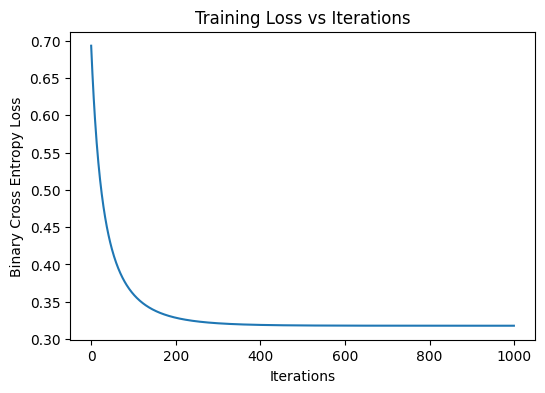

In [16]:
# Training the model
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X_scaled, y)

# Plotting training loss curve
plt.figure(figsize=(6, 4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss vs Iterations")
plt.show()

In [18]:
# computing accuracy
y_pred = model.predict(X_scaled) 
accuracy = np.mean(y_pred == y) * 100
print(f"Final Training Accuracy: {accuracy:.2f}%")

Final Training Accuracy: 94.00%



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [23]:
np.random.seed(45)

n, m = 6, 6                     # Matrix size
M = np.random.rand(n, m) * 10   # Random values between 0 and 10

print(M)

[[9.89011513 5.49544727 2.81447302 0.77289566 4.44469496 4.7280797 ]
 [0.48522001 1.63324448 1.15950711 6.27391683 8.56182049 6.50102421]
 [9.90721685 4.70350748 6.18294484 2.82667207 9.76003316 6.73067999]
 [4.40530889 2.8968734  5.09699684 1.12460896 2.26954789 4.78552305]
 [2.42758157 3.87982518 8.18873428 0.74540785 9.23149539 2.24896082]
 [7.06371485 1.10565457 6.01004124 4.06792538 8.3682945  2.50030428]]


In [27]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 

from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape                       
    
    # Flatten matrix elements into a column vector
    values = M.reshape(-1, 1)
    
    # Initialize and fit KMeans
    kmeans = KMeans(
        n_clusters=k,
        max_iter=max_iters,
        random_state=42
    )
    
    # Perform clustering
    labels = kmeans.fit_predict(values)
    
    # Extract centroid values
    centroids = kmeans.cluster_centers_.flatten()
    
    # Reshape labels back to matrix shape
    assignment_table = labels.reshape(n, m)
    
    # Create cookbook dictionary
    cookbook = {i: [] for i in range(k)}
    
    # Fill cookbook with matrix positions
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))
    
    return assignment_table, cookbook, centroids


In [28]:
k = 3
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)


Assignment Table:
 [[1 0 2 2 0 0]
 [2 2 2 0 1 0]
 [1 0 0 2 1 0]
 [0 2 0 2 2 0]
 [2 0 1 2 1 2]
 [1 2 0 0 1 2]]

Centroids:
 [5.23613685 8.87142808 1.78649655]


In [29]:
for cluster_id, positions in cookbook.items():
    print(f"\nCluster {cluster_id}:")
    print(positions)


Cluster 0:
[(0, 1), (0, 4), (0, 5), (1, 3), (1, 5), (2, 1), (2, 2), (2, 5), (3, 0), (3, 2), (3, 5), (4, 1), (5, 2), (5, 3)]

Cluster 1:
[(0, 0), (1, 4), (2, 0), (2, 4), (4, 2), (4, 4), (5, 0), (5, 4)]

Cluster 2:
[(0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (2, 3), (3, 1), (3, 3), (3, 4), (4, 0), (4, 3), (4, 5), (5, 1), (5, 5)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
